<a href="https://colab.research.google.com/github/thedarsideofit/udacity-tensorflow/blob/master/Celsius2Farenheit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando dependencias


In [6]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

import numpy as np

celsius_q = np.array([-40,-10,0,8,15,22, 38], dtype= float)
fahrenheit_a = np.array([-40,14,32,46,59,72,100], dtype= float)
for i,c  in enumerate(celsius_q):
  print("{} grados Celsius = {} grados en fahrenheit ". format(c,fahrenheit_a[i]))


-40.0 grados Celsius = -40.0 grados en fahrenheit 
-10.0 grados Celsius = 14.0 grados en fahrenheit 
0.0 grados Celsius = 32.0 grados en fahrenheit 
8.0 grados Celsius = 46.0 grados en fahrenheit 
15.0 grados Celsius = 59.0 grados en fahrenheit 
22.0 grados Celsius = 72.0 grados en fahrenheit 
38.0 grados Celsius = 100.0 grados en fahrenheit 


Creando una Capa (Layer) y ensamblando en un Modelo

In [0]:
onezero = tf.keras.layers.Dense(units= 1, input_shape= [1])
model = tf.keras.Sequential([onezero])

Compilar modelo con funciones de perdida y optimizacion

In [0]:
model.compile(loss = 'mean_squared_error', optimizer = tf.keras.optimizers.Adam(0.1))

Entranando al modelo

In [17]:
history = model.fit(celsius_q, fahrenheit_a, epochs = 500, verbose= False)
print('Entrenamiento del modelo finalizado')

Entrenamiento del modelo finalizado


Visualizando Estadisticas de Entrenamiento

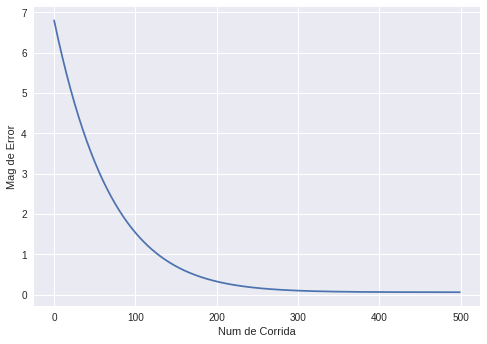

In [19]:
import matplotlib.pyplot as plt

plt.xlabel('Num de Corrida')
plt.ylabel('Mag de Error')
plt.plot(history.history['loss'])


Probando nuestro modelo la formula de conversion es  **F = C*1.8+32**

In [20]:
print(model.predict([100.0]))

[[211.74402]]


Observando los pesos finales de nuestra capa interna si se fijan uno es muy cercano a 1.8 y el otro a 32

In [22]:
print('Estos son las variables de las capas: {}'.format(onezero.get_weights()))

Estos son las variables de las capas: [array([[1.7981349]], dtype=float32), array([31.93053], dtype=float32)]


Probando con mas capas

In [0]:
onzero = tf.keras.layers.Dense(units= 4, input_shape= [1])
oneone = tf.keras.layers.Dense(units= 4)
onetwo = tf.keras.layers.Dense(units= 1)

model = tf.keras.Sequential([onezero, oneone, onetwo])
model.compile(loss = 'mean_squared_error', optimizer = tf.keras.optimizers.Adam(0.1))
history = model.fit(celsius_q, fahrenheit_a, epochs = 500, verbose= False)
print('Entrenamiento del modelo finalizado')

print(model.predict([100.0]))

In [0]:

plt.xlabel('Num de Corrida')
plt.ylabel('Mag de Error')
plt.plot(history.history['loss'])

Al revisar los pesos de las neuronas observamos que la agregar capas se incrementa la complejidad y  ya no existen valores similares a 1.8 y 32

In [26]:
print('Estos son las variables de las capa 10: {}'.format(onezero.get_weights()))
print('Estos son las variables de las capa 11: {}'.format(oneone.get_weights()))
print('Estos son las variables de las capa 12: {}'.format(onetwo.get_weights()))

Estos son las variables de las capa 10: [array([[1.6057816]], dtype=float32), array([28.420115], dtype=float32)]
Estos son las variables de las capa 11: [array([[ 0.04374631, -0.93778867,  0.2108961 ,  0.17643562]],
      dtype=float32), array([-0.3936935 , -0.02977885,  0.00697951, -0.06786563], dtype=float32)]
Estos son las variables de las capa 12: [array([[-0.00265146],
       [-1.0273557 ],
       [ 0.5350626 ],
       [ 0.24656637]], dtype=float32), array([0.11267595], dtype=float32)]
